In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


In [76]:
from ppo import train_ppo, PPOAgent
from sb3_model import train_sb3_ppo
from random_model import train_random_agent
from comparison import compare

In [77]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

ENV_NAME = "CartPole-v1"
TOTAL_TIMESTEPS = 1000000
print(f"Environment: {ENV_NAME}")
print(f"Training timesteps: {TOTAL_TIMESTEPS}")


Environment: CartPole-v1
Training timesteps: 1000000


In [78]:
results = {
    'models': [],
    'training_times': [],
    'episode_rewards': [],
    'final_performance': []
}

In [79]:
print("\nTraining Random Agent...")
start_time = time.time()
random_scores = train_random_agent(ENV_NAME, TOTAL_TIMESTEPS)
random_training_time = time.time() - start_time

results['models'].append('Random Agent')
results['training_times'].append(random_training_time)
results['episode_rewards'].append(random_scores)
results['final_performance'].append(np.mean(random_scores[-10:]) if len(random_scores) >= 10 else np.mean(random_scores))

print(f"Random Agent completed - Time: {random_training_time:.2f}s")


Training Random Agent...
Training Random Agent...
  Random Episode 100: Avg Score = 23.36
  Random Episode 200: Avg Score = 22.70
  Random Episode 300: Avg Score = 21.66
  Random Episode 400: Avg Score = 24.04
  Random Episode 500: Avg Score = 22.43
  Random Episode 600: Avg Score = 21.68
  Random Episode 700: Avg Score = 20.58
  Random Episode 800: Avg Score = 21.88
  Random Episode 900: Avg Score = 22.84
  Random Episode 1000: Avg Score = 22.56
  Random Episode 1100: Avg Score = 23.13
  Random Episode 1200: Avg Score = 22.48
  Random Episode 1300: Avg Score = 21.79
  Random Episode 1400: Avg Score = 22.66
  Random Episode 1500: Avg Score = 21.98
  Random Episode 1600: Avg Score = 21.11
  Random Episode 1700: Avg Score = 20.64
  Random Episode 1800: Avg Score = 22.29
  Random Episode 1900: Avg Score = 20.13
  Random Episode 2000: Avg Score = 21.79
  Random Episode 2100: Avg Score = 22.13
  Random Episode 2200: Avg Score = 22.34
  Random Episode 2300: Avg Score = 20.82
  Random Episod

In [80]:
print("\nTraining PPO Custom...")
start_time = time.time()
ppo_scores, ppo_agent = train_ppo(ENV_NAME, TOTAL_TIMESTEPS, save_model_flag=False)
ppo_training_time = time.time() - start_time

results['models'].append('PPO Custom')
results['training_times'].append(ppo_training_time)
results['episode_rewards'].append(ppo_scores)
results['final_performance'].append(np.mean(ppo_scores[-10:]) if len(ppo_scores) >= 10 else np.mean(ppo_scores))

print(f"PPO Custom completed - Time: {ppo_training_time:.2f}s")


Training PPO Custom...
Training PPO...
Horizon: 2048, Epochs: 10, Minibatch: 64
Episode 10, Timesteps: 198
   Last episode: 24.0 steps
   Avg (last 10): 19.8 (min: 11.0, max: 37.0)
Episode 20, Timesteps: 396
   Last episode: 12.0 steps
   Avg (last 10): 19.8 (min: 12.0, max: 54.0)
Episode 30, Timesteps: 661
   Last episode: 50.0 steps
   Avg (last 10): 26.5 (min: 10.0, max: 50.0)
Episode 40, Timesteps: 889
   Last episode: 19.0 steps
   Avg (last 10): 22.8 (min: 13.0, max: 74.0)
Episode 50, Timesteps: 1122
   Last episode: 15.0 steps
   Avg (last 10): 23.3 (min: 12.0, max: 50.0)
Episode 60, Timesteps: 1305
   Last episode: 48.0 steps
   Avg (last 10): 18.3 (min: 9.0, max: 48.0)
Episode 70, Timesteps: 1465
   Last episode: 18.0 steps
   Avg (last 10): 16.0 (min: 10.0, max: 30.0)
Episode 80, Timesteps: 1640
   Last episode: 52.0 steps
   Avg (last 10): 17.5 (min: 11.0, max: 52.0)
Episode 90, Timesteps: 1801
   Last episode: 14.0 steps
   Avg (last 10): 16.1 (min: 10.0, max: 24.0)
Episod

In [81]:
print("\nTraining Stable-Baselines3 PPO...")
sb3_model, sb3_scores, sb3_training_time = train_sb3_ppo(ENV_NAME, TOTAL_TIMESTEPS)

results['models'].append('SB3 PPO')
results['training_times'].append(sb3_training_time)
results['episode_rewards'].append(sb3_scores)
results['final_performance'].append(np.mean(sb3_scores[-10:]) if len(sb3_scores) >= 10 else np.mean(sb3_scores))

print(f"SB3 PPO completed - Time: {sb3_training_time:.2f}s")


Training Stable-Baselines3 PPO...
🏗️  Training Stable-Baselines3 PPO...
  SB3 Episode 50: Avg Reward (last 50) = 23.24
  SB3 Episode 100: Avg Reward (last 50) = 27.12
  SB3 Episode 150: Avg Reward (last 50) = 30.90
  SB3 Episode 200: Avg Reward (last 50) = 45.26
  SB3 Episode 250: Avg Reward (last 50) = 77.06
  SB3 Episode 300: Avg Reward (last 50) = 246.32
  SB3 Episode 350: Avg Reward (last 50) = 410.08
  SB3 Episode 400: Avg Reward (last 50) = 500.00
  SB3 Episode 450: Avg Reward (last 50) = 500.00
  SB3 Episode 500: Avg Reward (last 50) = 500.00
  SB3 Episode 550: Avg Reward (last 50) = 500.00
  SB3 Episode 600: Avg Reward (last 50) = 500.00
  SB3 Episode 650: Avg Reward (last 50) = 500.00
  SB3 Episode 700: Avg Reward (last 50) = 500.00
  SB3 Episode 750: Avg Reward (last 50) = 500.00
  SB3 Episode 800: Avg Reward (last 50) = 500.00
  SB3 Episode 850: Avg Reward (last 50) = 500.00
  SB3 Episode 900: Avg Reward (last 50) = 500.00
  SB3 Episode 950: Avg Reward (last 50) = 500.00
  

In [82]:
compare(ppo_scores=ppo_scores, sb3_scores=sb3_scores, random_scores=random_scores)



CONFRONTO MODELLI (3 modelli)
Pos  Modello         Score Finale Score Medio  Max      Std      Episodi 
--------------------------------------------------------------------------------
🥇    SB3 PPO              500.0       441.7     500   149.4    2266
🥈    PPO Custom           491.1       311.1     500   201.7    3214
🥉    Random Agent          22.8        22.2     134    11.9   44967

ANALISI DETTAGLIATA
--------------------------------------------------
Migliore: SB3 PPO (500.0)
Peggiore: Random Agent (22.8)
📈 Differenza: 477.2 punti (+2093%)

MIGLIORAMENTO vs RANDOM:
   PPO Custom: +2054%
   SB3 PPO: +2093%

STABILITÀ (minore std = più stabile):
   🎯 Random Agent: σ = 11.9
   ⚡ SB3 PPO: σ = 149.4
   📊 PPO Custom: σ = 201.7


{'models': {'ppo': {'name': 'PPO Custom',
   'scores': [18.0,
    17.0,
    37.0,
    14.0,
    14.0,
    13.0,
    11.0,
    14.0,
    36.0,
    24.0,
    25.0,
    14.0,
    14.0,
    22.0,
    15.0,
    13.0,
    15.0,
    54.0,
    14.0,
    12.0,
    10.0,
    12.0,
    22.0,
    32.0,
    27.0,
    46.0,
    17.0,
    15.0,
    34.0,
    50.0,
    14.0,
    14.0,
    13.0,
    21.0,
    16.0,
    23.0,
    13.0,
    21.0,
    74.0,
    19.0,
    29.0,
    19.0,
    12.0,
    50.0,
    14.0,
    18.0,
    26.0,
    12.0,
    38.0,
    15.0,
    33.0,
    14.0,
    14.0,
    13.0,
    17.0,
    10.0,
    13.0,
    9.0,
    12.0,
    48.0,
    30.0,
    14.0,
    14.0,
    11.0,
    10.0,
    16.0,
    18.0,
    13.0,
    16.0,
    18.0,
    14.0,
    12.0,
    14.0,
    16.0,
    13.0,
    14.0,
    11.0,
    14.0,
    15.0,
    52.0,
    22.0,
    24.0,
    14.0,
    18.0,
    10.0,
    11.0,
    24.0,
    14.0,
    10.0,
    14.0,
    30.0,
    27.0,
    18.0,
    15.0,
    17.0,

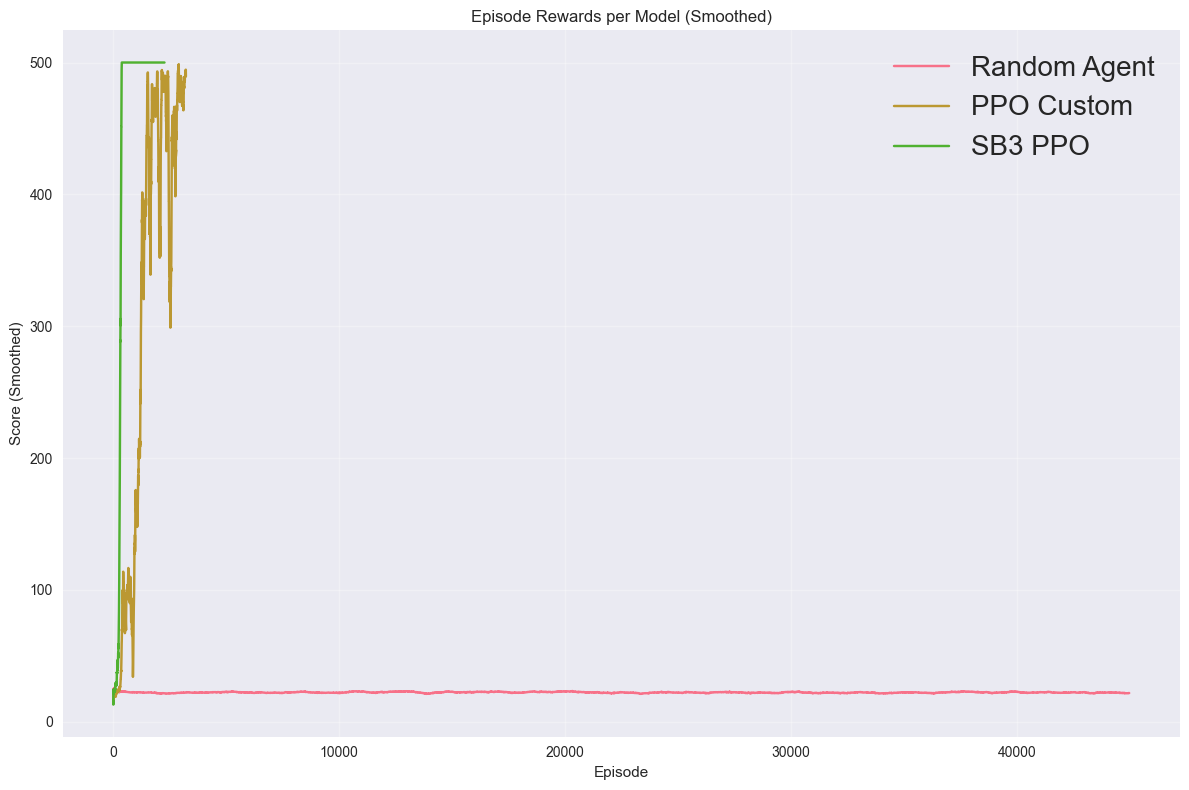

In [83]:
for model_name, scores in zip(results['models'], results['episode_rewards']):
    # Smooth the scores with a rolling mean for better visualization
    window = max(1, len(scores) // 50)
    smoothed = pd.Series(scores).rolling(window, min_periods=1).mean()
    plt.plot(range(1, len(scores) + 1), smoothed, label=model_name)

plt.xlabel('Episode')
plt.ylabel('Score (Smoothed)')
plt.title('Episode Rewards per Model (Smoothed)')
plt.legend(fontsize=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [84]:
import gymnasium as gym
import torch
import numpy as np
import cv2
import os
from datetime import datetime
from IPython.display import Video

VIDEO_NAME = f'my_ppo_episode_{datetime.now().strftime("%Y%m%d_%H%M%S")}.mp4'
MAX_STEPS = 500

print(f"Registrando un episodio del tuo modello PPO...")
print(f"Environment: {ENV_NAME}")
print(f"Video: {VIDEO_NAME}")

# Crea environment con render
env = gym.make(ENV_NAME, render_mode='rgb_array')

# Reset environment
state = env.reset()
if isinstance(state, tuple):
    state = state[0]

# Lista per salvare i frames
frames = []
episode_score = 0
step = 0

print(f"🎮 Inizio episodio...")

# Gioca un episodio completo
while step < MAX_STEPS:
    # Cattura frame
    frame = env.render()
    frames.append(frame)
    
    # Azione del modello (assicurati che ppo_agent sia definito)
    with torch.no_grad():
        action, _, _ = ppo_agent.policy.act(torch.FloatTensor(state).unsqueeze(0))
    
    # Esegui azione
    next_state, reward, done, _, _ = env.step(action)
    
    state = next_state
    episode_score += reward
    step += 1
    
    # Termina se episodio finito
    if done:
        break 

env.close()

print(f"Episodio completato!")
print(f"Score finale: {episode_score}")
print(f"Frames registrati: {len(frames)}")
print(f"⏱Durata: {step} steps")

def save_video(frames, filename, fps=30):
    """Salva i frames come video MP4"""
    height, width, channels = frames[0].shape
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(filename, fourcc, fps, (width, height))
    
    for frame in frames:
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame_bgr)
    
    out.release()
    print(f"Video salvato: {filename}")
    return True

Registrando un episodio del tuo modello PPO...
Environment: CartPole-v1
Video: my_ppo_episode_20250630_180337.mp4
🎮 Inizio episodio...
Episodio completato!
Score finale: 500.0
Frames registrati: 500
⏱Durata: 500 steps


In [85]:
save_video(frames, VIDEO_NAME)

Video salvato: my_ppo_episode_20250630_180337.mp4


True